### Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

### Importing Required Library

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle 
import scikitplot as skplt
pd.set_option('display.max_columns', None) # # For display maximum column
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, plot_roc_curve
import xgboost as xgb
%matplotlib inline
    
import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [2]:
df = pd.read_csv(r"C:\Users\Kushal Arya\Desktop\csv file\census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Check no of row and column

In [3]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (32560, 15)


### Checking for Null values

In [4]:
print('==============================\n')
print(df.isnull().sum())
print('\n==============================')


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64



#### There is no null value

### Information about dataset

In [5]:
print('====================================================\n')
print(df.info())
print('======================================================')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


#### Categorical data present in our data set

### Analysis of Data Respect To Income

### Age column

In [6]:
df['Age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

In [7]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [8]:
b = df.groupby('Age')['Income'].value_counts().sort_values()
b

Age  Income
87    <=50K      1
86    <=50K      1
84    >50K       1
19    >50K       2
83    >50K       2
              ... 
20    <=50K    753
27    <=50K    754
24    <=50K    767
25    <=50K    788
23    <=50K    865
Name: Income, Length: 138, dtype: int64

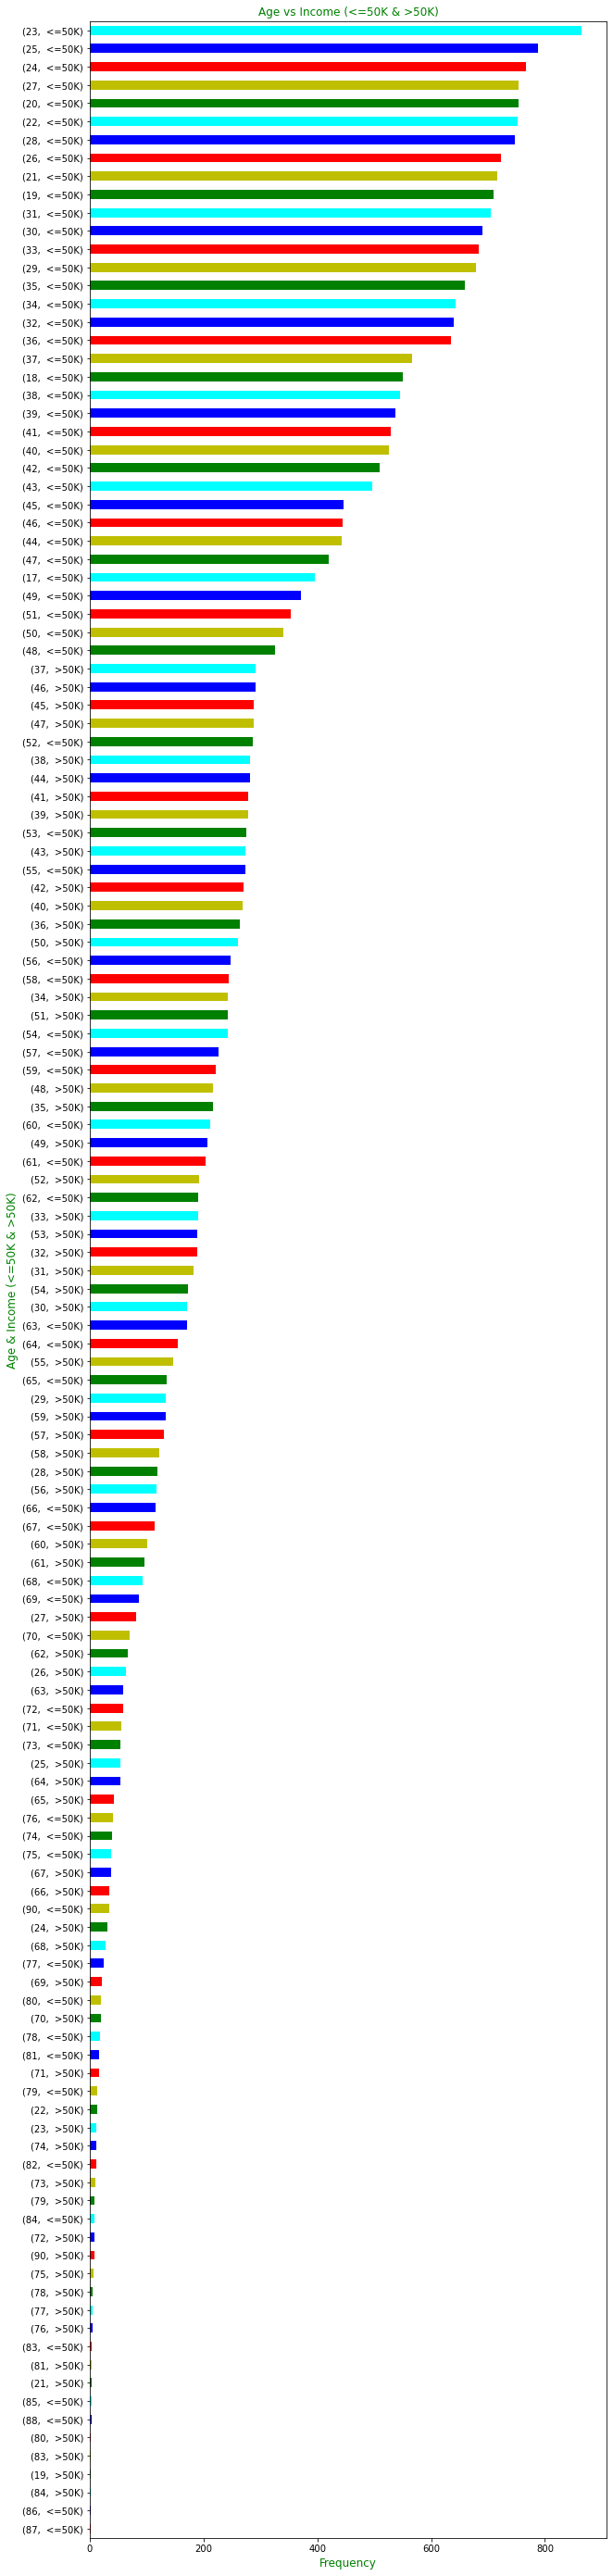

In [9]:
b.plot.barh(figsize = (10,50), color = ['red', 'blue', 'cyan', 'g', 'y'])
plt.xlabel('Frequency', c = 'g', fontsize = 12)
plt.ylabel('Age & Income (<=50K & >50K)', c = 'g', fontsize = 12 )
plt.title('Age vs Income (<=50K & >50K)', c = 'g', fontsize = 12)
plt.show()

#### Above plot shows whoes age is 23 years they have higest income frequency more than 800 people earn (<=50K) 

In [10]:
a = df['Age'][df['Age']<=50].value_counts().sort_values()
a

17    395
48    543
18    550
49    577
50    602
47    708
19    712
21    720
44    724
45    734
46    737
20    753
22    765
43    770
42    780
26    785
40    794
24    798
41    808
29    813
39    815
38    827
32    828
27    835
25    841
37    858
30    861
28    867
33    875
35    876
23    877
34    886
31    888
36    898
Name: Age, dtype: int64

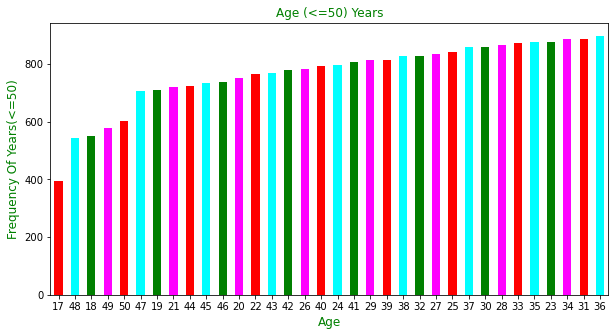

In [11]:
a.plot.bar(figsize = (10,5), rot = 360, color = ['red','cyan', 'g', 'magenta'])
plt.xlabel('Age', c = 'g', fontsize = 12)
plt.ylabel('Frequency Of Years(<=50)', c = 'g', fontsize = 12 )
plt.title('Age (<=50) Years', c = 'g', fontsize = 12)
plt.show()

#### Abobe plot No of people whoes Age (<=50) years

### Workclass column

In [12]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

#### Observation : In Workclass column there is '?' present. We solve this problem to replace '?' with nan value


In [13]:
# Approach to remove '?' in Workclass column 
df['Workclass'] = df['Workclass'].str.strip().map(lambda x: np.nan if x=="?" else x)

In [14]:
df.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation           0
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country       0
Income               0
dtype: int64

#### Conclusion : In Workclass column '?' remove and replace with nan value. We fill nan with mode

In [15]:
df['Workclass'].fillna(df['Workclass'].mode()[0], inplace = True)

In [16]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

#### There is no null value in Workclass column we ready to do our analysis

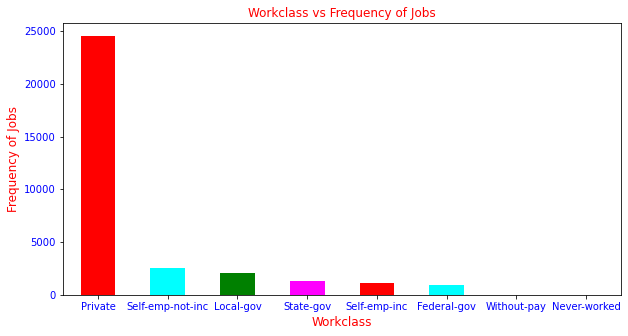

In [17]:
df['Workclass'].value_counts().plot.bar(figsize = (10,5), rot = 360, color = ['red','cyan', 'g', 'magenta'])
plt.xlabel('Workclass', c = 'r', fontsize = 12)
plt.ylabel('Frequency of Jobs', c = 'r', fontsize = 12 )
plt.title('Workclass vs Frequency of Jobs', c = 'r', fontsize = 12)
plt.xticks(c = 'b')
plt.yticks(c = 'b')
plt.show()

#### Above plot shows Private Job has higest frequency of job working

In [18]:
w = df.groupby('Workclass')['Income'].value_counts()
w

Workclass         Income
Federal-gov        <=50K      589
                   >50K       371
Local-gov          <=50K     1476
                   >50K       617
Never-worked       <=50K        7
Private            <=50K    19378
                   >50K      5154
Self-emp-inc       >50K       622
                   <=50K      494
Self-emp-not-inc   <=50K     1817
                   >50K       724
State-gov          <=50K      944
                   >50K       353
Without-pay        <=50K       14
Name: Income, dtype: int64

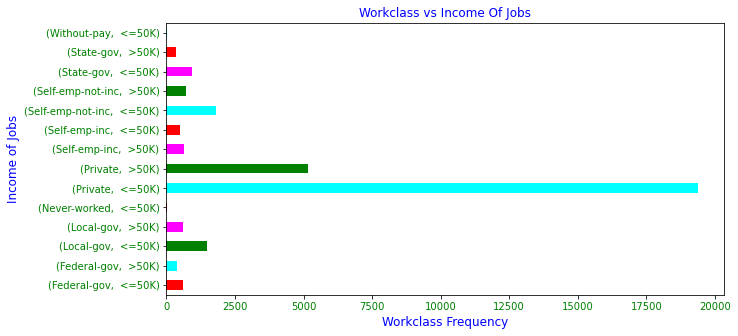

In [19]:
w.plot.barh(figsize = (10,5), color = ['red','cyan', 'g', 'magenta'])
plt.xlabel('Workclass Frequency', c = 'b', fontsize = 12)
plt.ylabel('Income of Jobs', c = 'b', fontsize = 12 )
plt.title('Workclass vs Income Of Jobs', c = 'b', fontsize = 12)
plt.xticks(c = 'g')
plt.yticks(c = 'g')
plt.show()

#### Above plot shows private job which salary <=50K is higest frequency and without-pay has lowest

### Education column

In [20]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

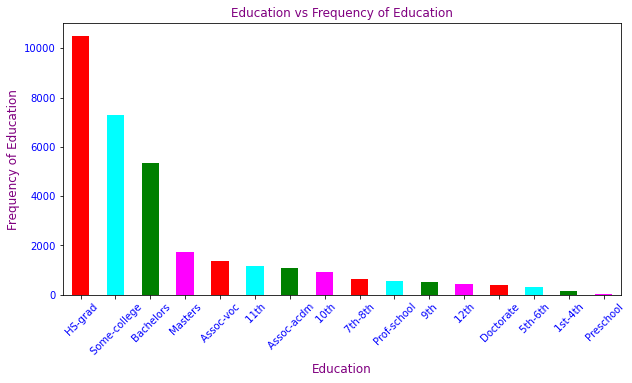

In [21]:
df['Education'].value_counts().plot.bar(figsize = (10,5), rot = 45, color = ['red','cyan', 'g', 'magenta'])
plt.xlabel('Education', c = 'purple', fontsize = 12)
plt.ylabel('Frequency of Education', c = 'purple', fontsize = 12 )
plt.title('Education vs Frequency of Education', c = 'purple', fontsize = 12)
plt.xticks(c = 'b')
plt.yticks(c = 'b')
plt.show()

#### Above plot shows HS-grad has more than 10000 counts

In [22]:
e = df.groupby('Education')['Income'].value_counts().sort_values()
e

Education      Income
 1st-4th        >50K        6
 5th-6th        >50K       16
 9th            >50K       27
 12th           >50K       33
 7th-8th        >50K       40
 Preschool      <=50K      51
 11th           >50K       60
 10th           >50K       62
 Doctorate      <=50K     107
 Prof-school    <=50K     153
 1st-4th        <=50K     162
 Assoc-acdm     >50K      265
 Doctorate      >50K      306
 5th-6th        <=50K     317
 Assoc-voc      >50K      361
 12th           <=50K     400
 Prof-school    >50K      423
 9th            <=50K     487
 7th-8th        <=50K     606
 Masters        <=50K     764
 Assoc-acdm     <=50K     802
 10th           <=50K     871
 Masters        >50K      959
 Assoc-voc      <=50K    1021
 11th           <=50K    1115
 Some-college   >50K     1387
 HS-grad        >50K     1675
 Bachelors      >50K     2221
                <=50K    3133
 Some-college   <=50K    5904
 HS-grad        <=50K    8826
Name: Income, dtype: int64

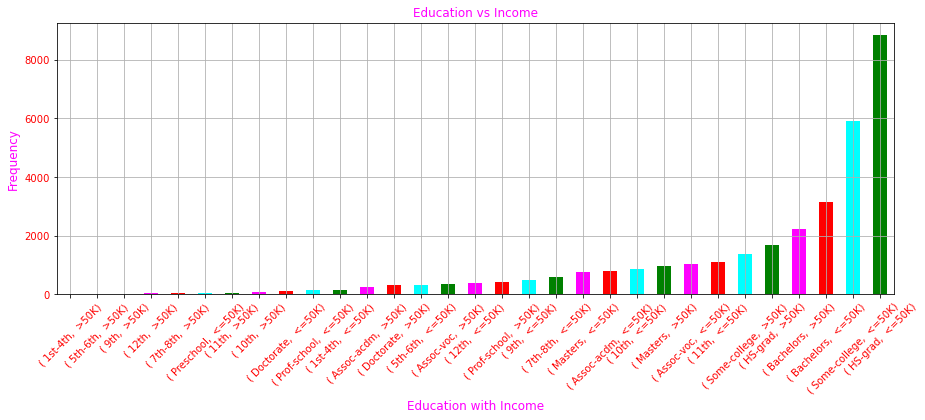

In [23]:
e.plot.bar(figsize = (15,5),rot= 45,color = ['red','cyan', 'g', 'magenta'])
plt.xlabel('Education with Income', c = 'magenta', fontsize = 12)
plt.ylabel('Frequency', c = 'magenta', fontsize = 12 )
plt.title('Education vs Income', c = 'magenta', fontsize = 12)
plt.xticks(c = 'red')
plt.yticks(c = 'red')
plt.grid()
plt.show()

#### Above plot shows HS-grad who earn (<=50K) has higest frequency

### Marital Status column

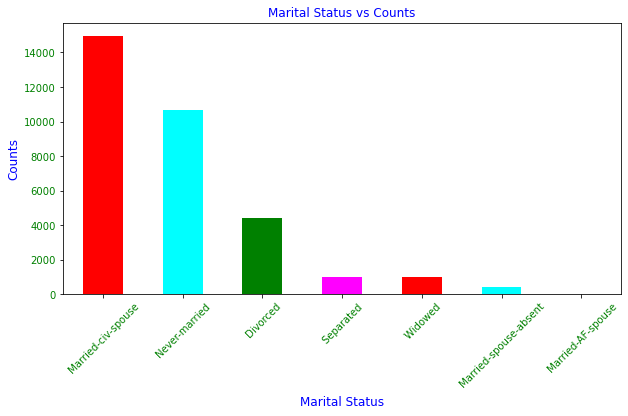

In [24]:
df['Marital_status'].value_counts().plot.bar(figsize = (10,5),rot= 45,color = ['red','cyan', 'g', 'magenta'])
plt.xticks(c = 'g')
plt.yticks(c = 'g')
plt.xlabel('Marital Status', c = 'b', fontsize = 12)
plt.ylabel('Counts', c = 'b', fontsize = 12 )
plt.title('Marital Status vs Counts', c = 'b', fontsize = 12)
plt.show()

#### Above plot shows Married-civ-spouse is higest frequency

In [25]:
m = df.groupby('Marital_status')['Income'].value_counts()
m

Marital_status          Income
 Divorced                <=50K     3980
                         >50K       463
 Married-AF-spouse       <=50K       13
                         >50K        10
 Married-civ-spouse      <=50K     8284
                         >50K      6692
 Married-spouse-absent   <=50K      384
                         >50K        34
 Never-married           <=50K    10191
                         >50K       491
 Separated               <=50K      959
                         >50K        66
 Widowed                 <=50K      908
                         >50K        85
Name: Income, dtype: int64

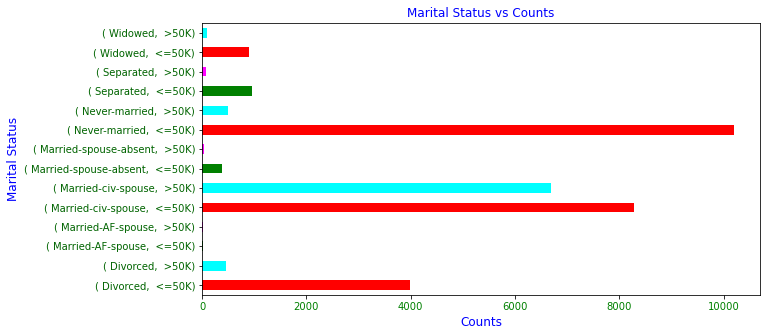

In [26]:
m.plot.barh(figsize = (10,5),color = ['red','cyan', 'g', 'magenta'])
plt.yticks(c = 'darkgreen', alpha = 1)
plt.xticks(c = '#008000', alpha = 1)
plt.ylabel('Marital Status', c = 'b', fontsize = 12)
plt.xlabel('Counts', c = 'b', fontsize = 12 )
plt.title('Marital Status vs Counts', c = 'b', fontsize = 12)
plt.show()

#### Above plot shows Never married earn (<=50K) is higest counts

### Occupation column

In [27]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

#### Observation : In Occupation column there is '?' present. We solve this problem to replace '?' with nan value

In [28]:
# Approach to remove '?' in Occupation column 
df['Occupation'] = df['Occupation'].str.strip().map(lambda x: np.nan if x=="?" else x)

In [29]:
df.isna().sum()

Age                  0
Workclass            0
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country       0
Income               0
dtype: int64

#### Conclusion : In Occupation column '?' remove and replace with nan value. We fill nan with mode

In [30]:
df['Occupation'].fillna(df['Occupation'].mode()[0], inplace = True)

In [31]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

#### There is no null value in Occupation column we ready to do our analysis

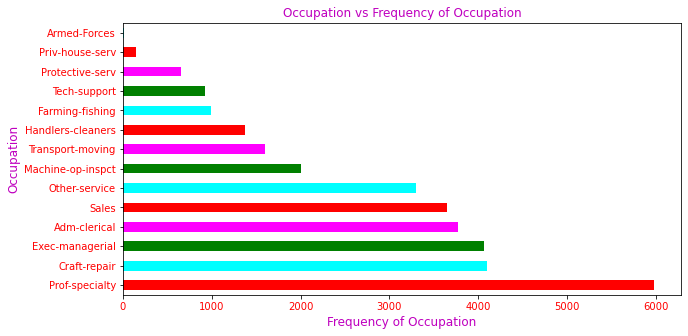

In [32]:
df['Occupation'].value_counts().plot.barh(figsize = (10,5),color = ['red','cyan', 'g', 'magenta'])
plt.ylabel('Occupation', c = 'm', fontsize = 12)
plt.xlabel('Frequency of Occupation', c = 'm', fontsize = 12 )
plt.title('Occupation vs Frequency of Occupation', c = 'm', fontsize = 12)
plt.xticks(c = 'r')
plt.yticks(c = 'r')
plt.show()

In [33]:
o = df.groupby('Occupation')['Income'].value_counts().sort_values()
o

Occupation         Income
Armed-Forces        >50K        1
Priv-house-serv     >50K        1
Armed-Forces        <=50K       8
Handlers-cleaners   >50K       86
Farming-fishing     >50K      115
Other-service       >50K      137
Priv-house-serv     <=50K     148
Protective-serv     >50K      211
Machine-op-inspct   >50K      250
Tech-support        >50K      283
Transport-moving    >50K      320
Protective-serv     <=50K     438
Adm-clerical        >50K      507
Tech-support        <=50K     645
Farming-fishing     <=50K     879
Craft-repair        >50K      929
Sales               >50K      983
Transport-moving    <=50K    1277
Handlers-cleaners   <=50K    1284
Machine-op-inspct   <=50K    1752
Exec-managerial     >50K     1968
Prof-specialty      >50K     2050
Exec-managerial     <=50K    2098
Sales               <=50K    2667
Other-service       <=50K    3158
Craft-repair        <=50K    3170
Adm-clerical        <=50K    3262
Prof-specialty      <=50K    3933
Name: Income, dtype: i

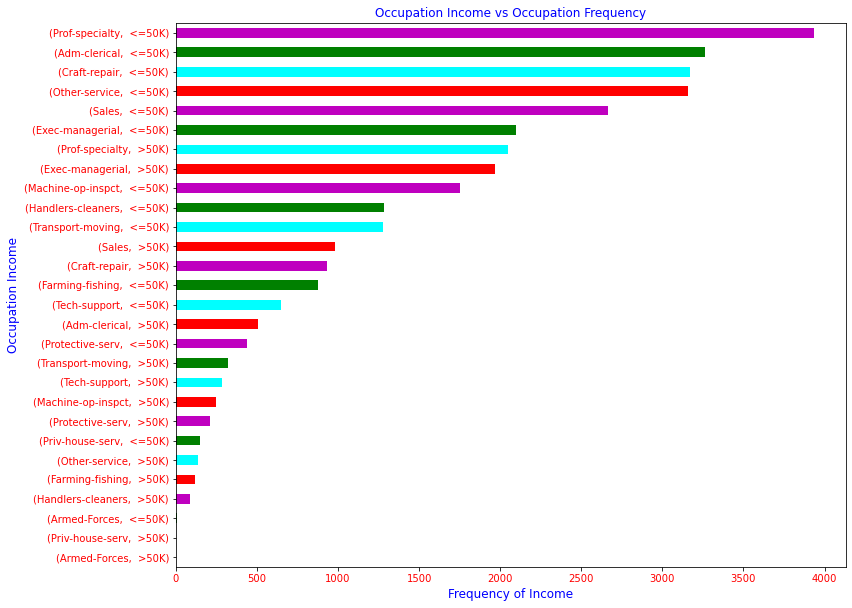

In [34]:
o.plot.barh(figsize = (12,10),color = ['red','cyan', 'g', 'm'])
plt.ylabel('Occupation Income', c = 'b', fontsize = 12)
plt.xlabel('Frequency of Income', c = 'b', fontsize = 12 )
plt.title('Occupation Income vs Occupation Frequency', c = 'b', fontsize = 12)
plt.xticks(c = 'r')
plt.yticks(c = 'r')
plt.show()

#### Above plot shows nearly 4000 Prof-specialty people having occupation earn (<=50K) is higest among all 

### Relationship column

In [35]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [36]:
f = df.groupby('Relationship')['Income'].value_counts()
f

Relationship     Income
 Husband          <=50K    7275
                  >50K     5918
 Not-in-family    <=50K    7448
                  >50K      856
 Other-relative   <=50K     944
                  >50K       37
 Own-child        <=50K    5001
                  >50K       67
 Unmarried        <=50K    3228
                  >50K      218
 Wife             <=50K     823
                  >50K      745
Name: Income, dtype: int64

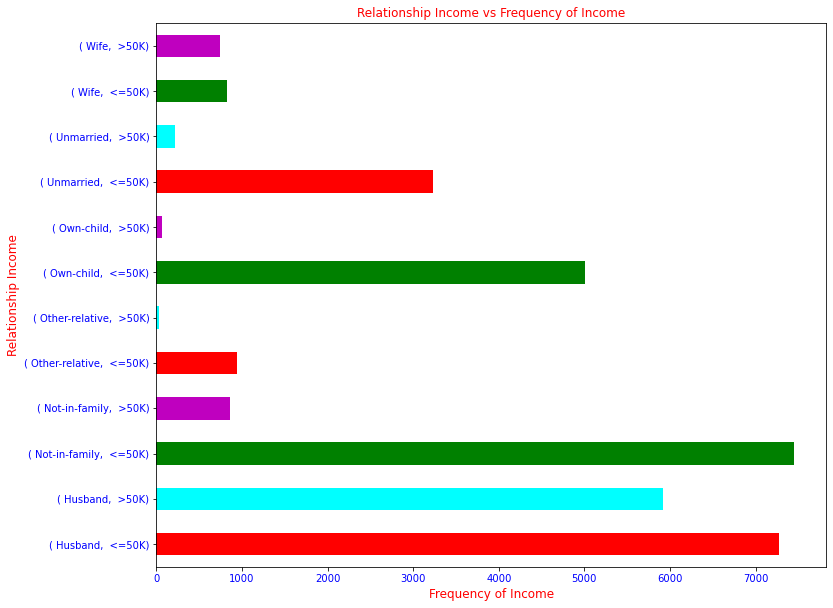

In [37]:
f.plot.barh(figsize = (12,10),color = ['red','cyan', 'g', 'm'])
plt.ylabel('Relationship Income', c = 'r', fontsize = 12)
plt.xlabel('Frequency of Income', c = 'r', fontsize = 12 )
plt.title('Relationship Income vs Frequency of Income', c = 'r', fontsize = 12)
plt.xticks(c = 'b')
plt.yticks(c = 'b')
plt.show()

#### Above plot shows who has Not in family earn (<=50K) is higest frequency

### Race column

In [38]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [39]:
r = df.groupby('Race')['Income'].value_counts().sort_values()
r

Race                 Income
 Other                >50K        25
 Amer-Indian-Eskimo   >50K        36
 Other                <=50K      246
 Amer-Indian-Eskimo   <=50K      275
 Asian-Pac-Islander   >50K       276
 Black                >50K       387
 Asian-Pac-Islander   <=50K      763
 Black                <=50K     2737
 White                >50K      7117
                      <=50K    20698
Name: Income, dtype: int64

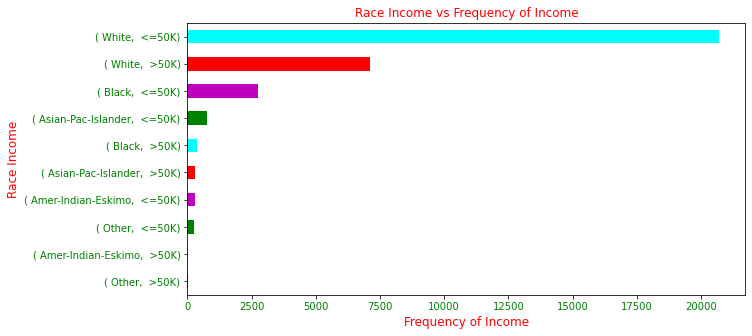

In [40]:
r.plot.barh(figsize = (10,5),color = ['red','cyan', 'g', 'm'])
plt.ylabel('Race Income', c = 'r', fontsize = 12)
plt.xlabel('Frequency of Income', c = 'r', fontsize = 12 )
plt.title('Race Income vs Frequency of Income', c = 'r', fontsize = 12)
plt.xticks(c = 'g')
plt.yticks(c = 'g')
plt.show()

#### Above plot shows white people earn (<=50K) is higest frequency

### Sex column

In [41]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [42]:
s = df.groupby('Sex')['Income'].value_counts()
s

Sex      Income
 Female   <=50K     9592
          >50K      1179
 Male     <=50K    15127
          >50K      6662
Name: Income, dtype: int64

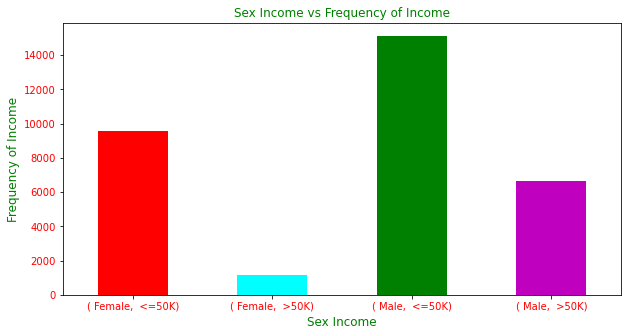

In [43]:
s.plot.bar(figsize = (10,5),rot= 360,color = ['red','cyan', 'g', 'm'])
plt.xlabel('Sex Income', c = 'g', fontsize = 12)
plt.ylabel('Frequency of Income', c = 'g', fontsize = 12 )
plt.title('Sex Income vs Frequency of Income', c = 'g', fontsize = 12)
plt.xticks(c = 'r')
plt.yticks(c = 'r')
plt.show()

#### Above plot shows male earn (<=50K) is higest frequency and female earn (>50K) is lowest frequency

### Hours per week column

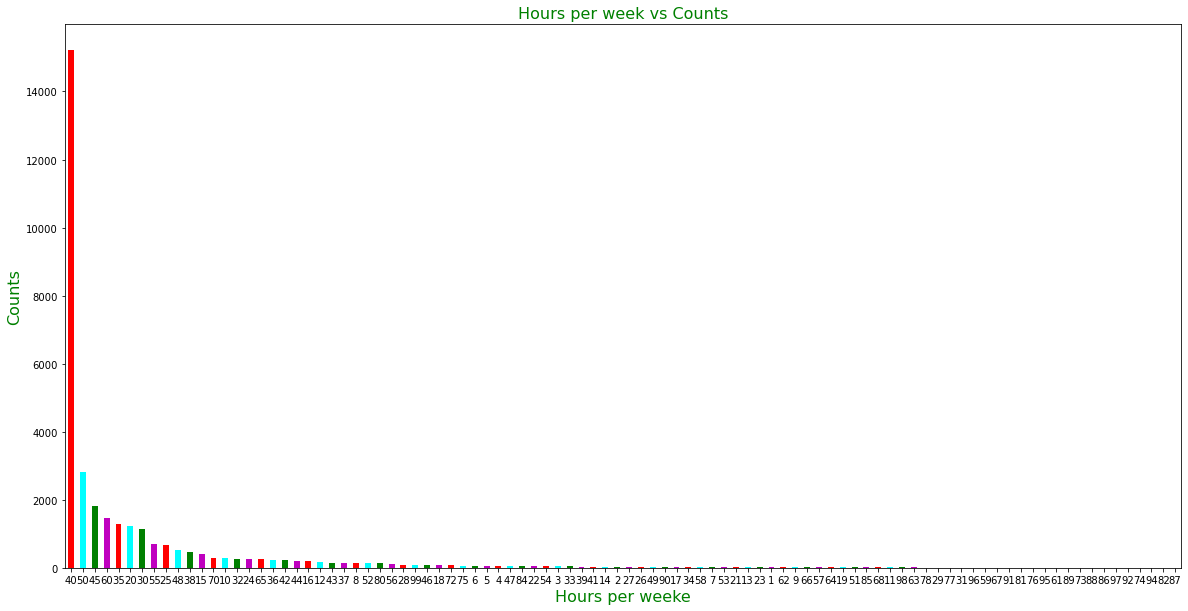

In [44]:
df['Hours_per_week'].value_counts().plot.bar(figsize = (20,10),rot= 360,color = ['red','cyan', 'g', 'm'])
plt.xlabel('Hours per weeke', c = 'g', fontsize = 16)
plt.ylabel('Counts', c = 'g', fontsize = 16 )
plt.title('Hours per week vs Counts', c = 'g', fontsize = 16)
plt.show()

#### Above plot shows who work 40 Hours_per_week has highest frequency

In [45]:
h = df.groupby('Hours_per_week')['Income'].value_counts().sort_values()
h

Hours_per_week  Income
92               <=50K        1
74               <=50K        1
95               >50K         1
73               >50K         1
17               >50K         1
                          ...  
20               <=50K     1146
50               >50K      1276
                 <=50K     1543
40               >50K      3247
                 <=50K    11969
Name: Income, Length: 173, dtype: int64

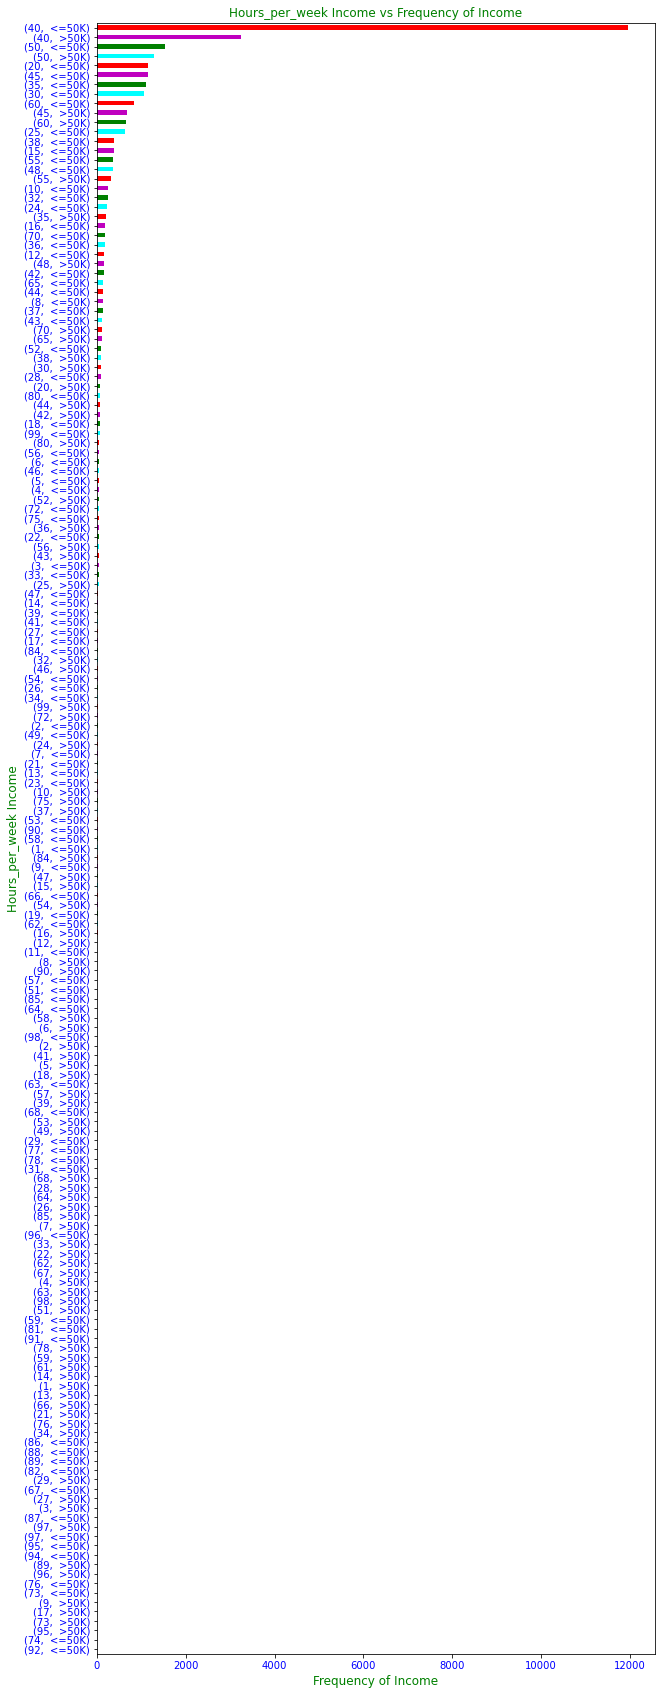

In [46]:
h.plot.barh(figsize = (10,30),rot= 360,color = ['red','cyan', 'g', 'm'])
plt.ylabel('Hours_per_week Income', c = 'g', fontsize = 12)
plt.xlabel('Frequency of Income', c = 'g', fontsize = 12 )
plt.title('Hours_per_week Income vs Frequency of Income', c = 'g', fontsize = 12)
plt.xticks(c = 'b')
plt.yticks(c = 'b')
plt.show()

#### Above plot shows who work 40 Hours per week highest frequency

### Native Country column

In [47]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

#### Observation : In Native Country column there is '?' present. We solve this problem to replace '?' with nan value

In [48]:
# Approach to remove '?' in Native Country column 
df['Native_country'] = df['Native_country'].str.strip().map(lambda x: np.nan if x=="?" else x)

In [49]:
df.isna().sum()

Age                 0
Workclass           0
Fnlwgt              0
Education           0
Education_num       0
Marital_status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_gain        0
Capital_loss        0
Hours_per_week      0
Native_country    583
Income              0
dtype: int64

#### Conclusion : In Occupation column '?' remove and replace with nan value. We fill nan with mode

In [50]:
df['Native_country'].fillna(df['Native_country'].mode()[0], inplace = True)

In [51]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

#### There is no null value in Native Country column we ready to do our analysis

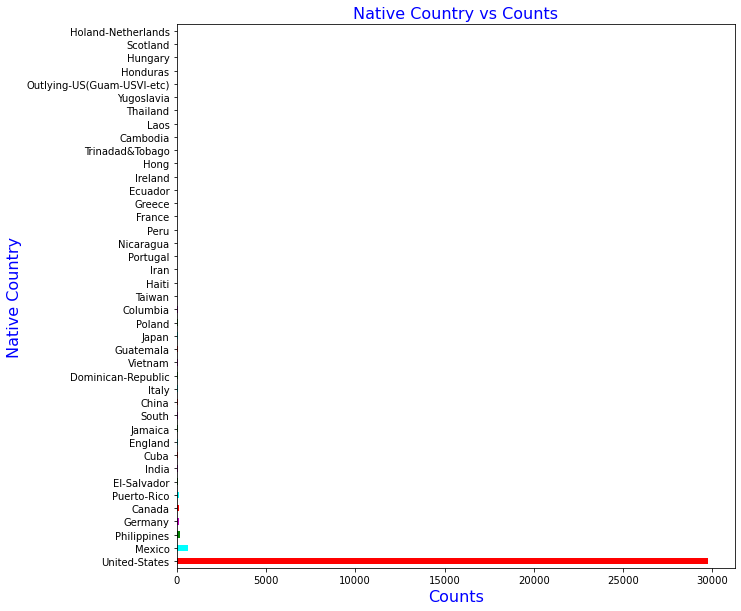

In [52]:
df['Native_country'].value_counts().plot.barh(figsize = (10,10),rot= 360,color = ['red','cyan', 'g', 'm'])
plt.ylabel('Native Country', c = 'b', fontsize = 16)
plt.xlabel('Counts', c = 'b', fontsize = 16 )
plt.title('Native Country vs Counts', c = 'b', fontsize = 16)
plt.show()

#### Above plot shows US has highest counts

In [53]:
n = df.groupby('Native_country')['Income'].value_counts().sort_values()
n

Native_country      Income
Holand-Netherlands   <=50K        1
Honduras             >50K         1
Laos                 >50K         2
Peru                 >50K         2
Dominican-Republic   >50K         2
                              ...  
Puerto-Rico          <=50K      102
Philippines          <=50K      137
Mexico               <=50K      610
United-States        >50K      7317
                     <=50K    22435
Name: Income, Length: 80, dtype: int64

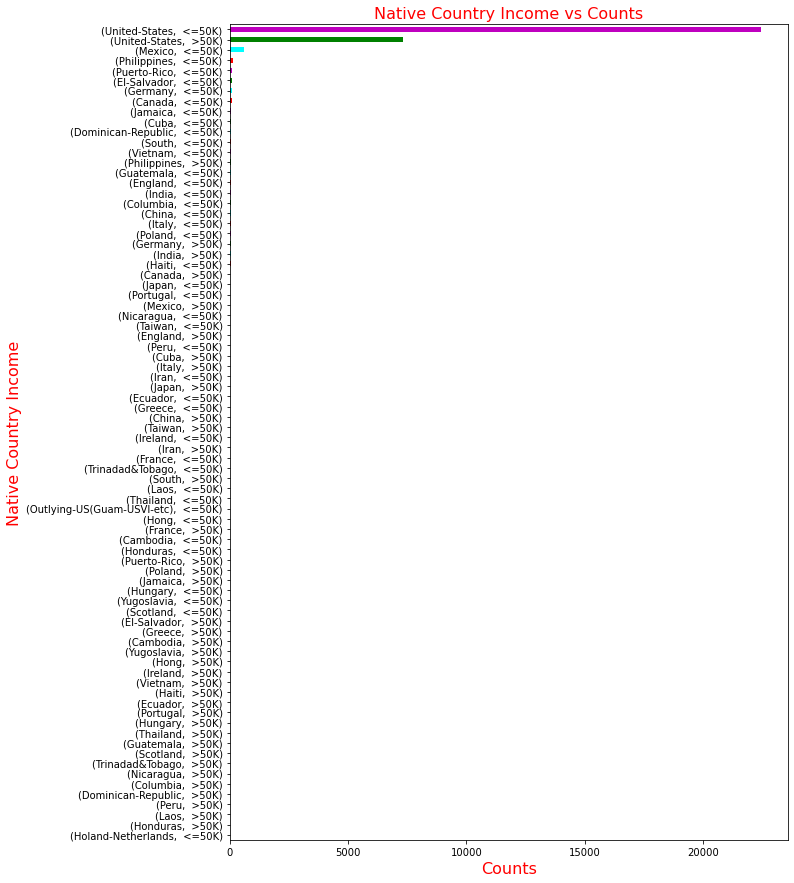

In [54]:
n.plot.barh(figsize = (10,15),color = ['red','cyan', 'g', 'm'])
plt.ylabel('Native Country Income', c = 'r', fontsize = 16)
plt.xlabel('Counts', c = 'r', fontsize = 16 )
plt.title('Native Country Income vs Counts', c = 'r', fontsize = 16)
plt.show()

#### Above plot shows US has highest income 

### Corelation of Feature vs Label using Heat map

-----------
Heat Map :-
-----------


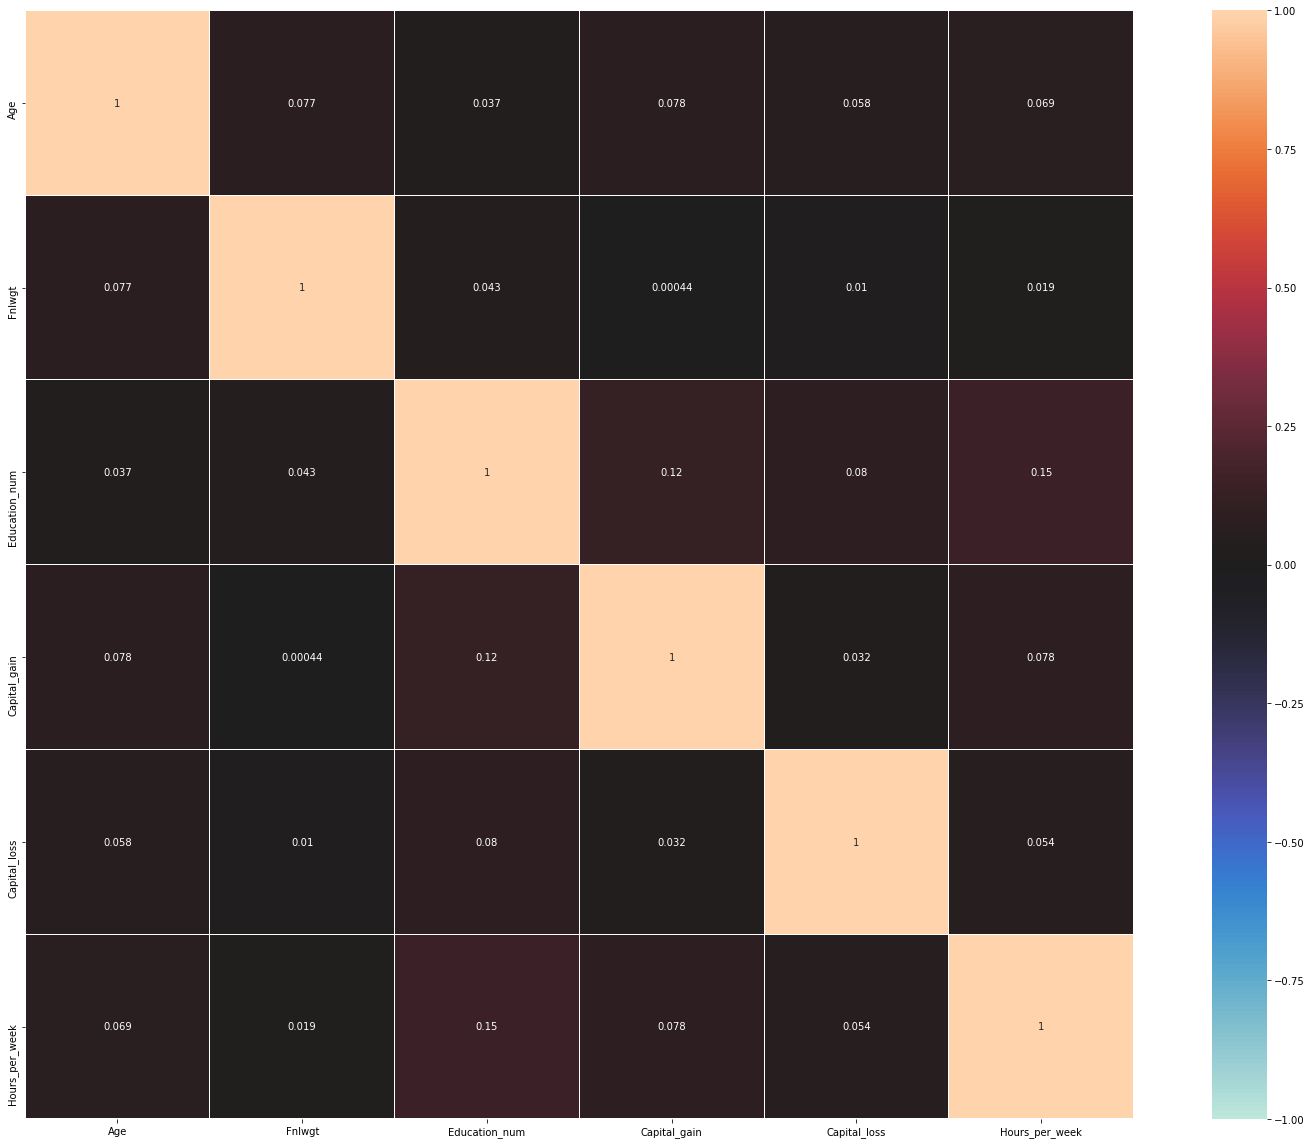

In [65]:
print('-----------')
print('Heat Map :-')
print('-----------')
df_corr = df.corr().abs()

plt.figure(figsize = (22,16))
sns.heatmap(df_corr, vmin = -1, annot = True, square = True, center = 0, fmt = '.2g', linewidths = .1)
plt.tight_layout()

#### Feature are not related

### Spliting Dataset into features and labels

In [104]:
x = df.drop('Income', axis = 1)
y = df. Income
print('Data has been splited')

Data has been splited


------------------------
Scatter Plot :-
------------------------


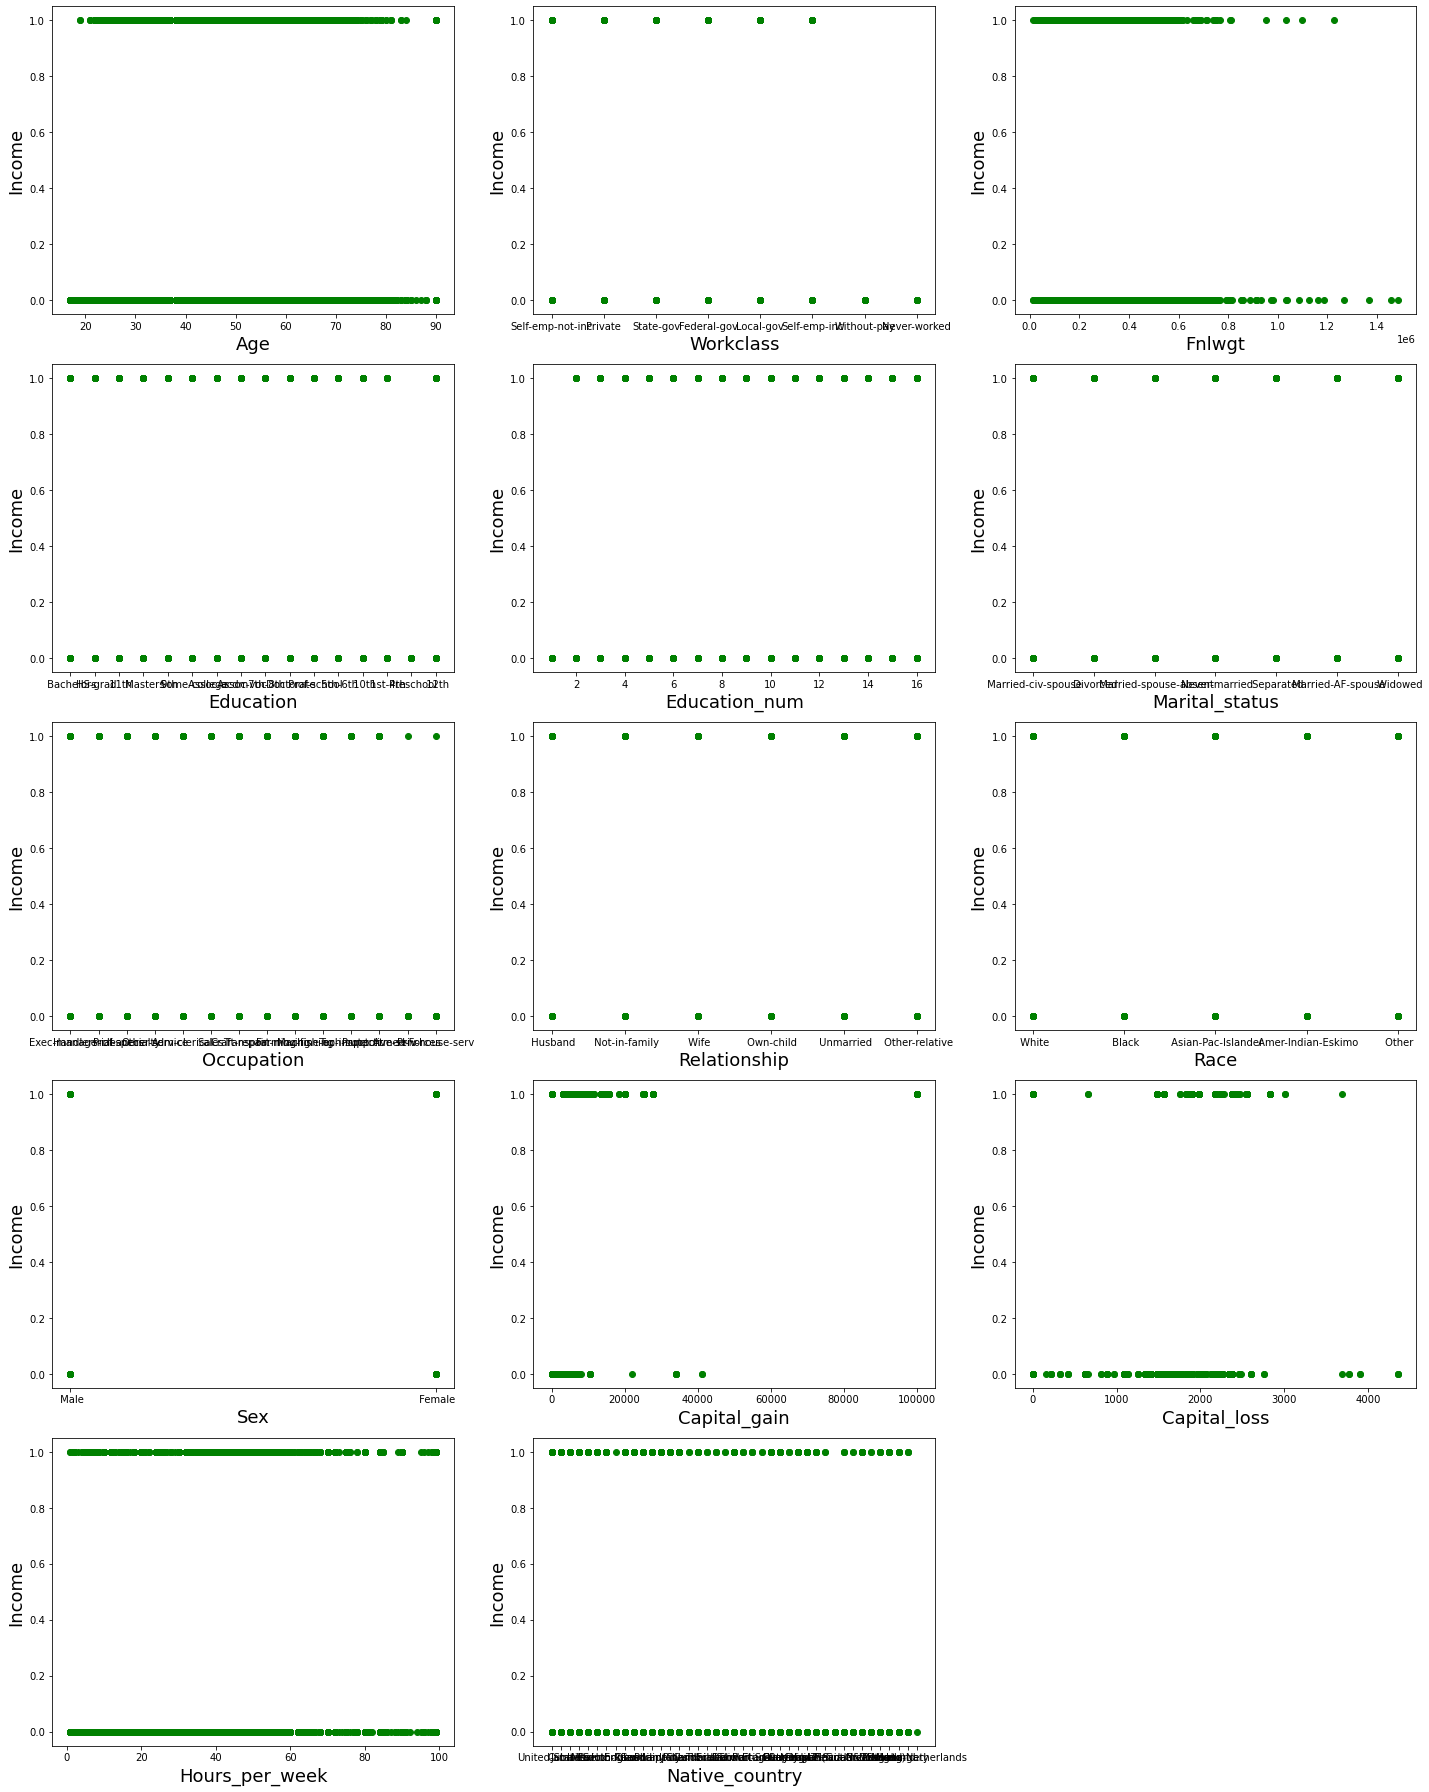

In [105]:
# Let' see relation between features and labels.
print('------------------------')
print('Scatter Plot :-')
print('------------------------')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in x:
    if plotnumber <=14:
        ax = plt.subplot(5,3, plotnumber)
        plt.scatter(x[column],y, c = 'g')
        plt.xlabel(column, fontsize = 18)
        plt.ylabel('Income', fontsize = 18)
    plotnumber += 1
plt.tight_layout()

In [71]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

#### Class are not balanced before balance it we first encode it

In [101]:
le = LabelEncoder()

In [102]:
df['Income'] = le.fit_transform(df['Income'])

In [103]:
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

#### Class are encoded

### Filter Categorical features

In [108]:
numerics = ['int64', 'int32']
categorical_col = []
features = x.columns.values.tolist()
for col in features:
    if x[col].dtype in numerics:
        continue
    categorical_col.append(col)

### Encoding categorical columns using get dummies

In [109]:
x_dummies = pd.get_dummies(x[categorical_col], drop_first = False)
x_dummies.head()

,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Education_ 10th,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Divorced,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_Adm-clerical,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Native_country_Cambodia,Native_country_Canada,Native_country_China,Native_country_Columbia,Native_country_Cuba,Native_country_Dominican-Republic,Native_country_Ecuador,Native_country_El-Salvador,Native_country_England,Native_country_France,Native_country_Germany,Native_country_Greece,Native_country_Guatemala,Native_country_Haiti,Native_country_Holand-Netherlands,Native_country_Honduras,Native_country_Hong,Native_country_Hungary,Native_country_India,Native_country_Iran,Native_country_Ireland,Native_country_Italy,Native_country_Jamaica,Native_country_Japan,Native_country_Laos,Native_country_Mexico,Native_country_Nicaragua,Native_country_Outlying-US(Guam-USVI-etc),Native_country_Peru,Native_country_Philippines,Native_country_Poland,Native_country_Portugal,Native_country_Puerto-Rico,Native_country_Scotland,Native_country_South,Native_country_Taiwan,Native_country_Thailand,Native_country_Trinadad&Tobago,Native_country_United-States,Native_country_Vietnam,Native_country_Yugoslavia
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [80]:
print('No of Rows and columns of encoded dataset ==========>',x_dummies.shape)

No of Rows and columns of encoded dataset ==========> (32560, 99)


In [110]:
x = x.join(x_dummies)
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Education_ 10th,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Divorced,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_Adm-clerical,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Native_country_Cambodia,Native_country_Canada,Native_country_China,Native_country_Columbia,Native_country_Cuba,Native_country_Dominican-Republic,Native_country_Ecuador,Native_country_El-Salvador,Native_country_England,Native_country_France,Native_country_Germany,Native_country_Greece,Native_country_Guatemala,Native_country_Haiti,Native_country_Holand-Netherlands,Native_country_Honduras,Native_country_Hong,Native_country_Hungary,Native_country_India,Native_country_Iran,Native_country_Ireland,Native_country_Italy,Native_country_Jamaica,Native_country_Japan,Native_country_Laos,Native_country_Mexico,Native_country_Nicaragua,Native_country_Outlying-US(Guam-USVI-etc),Native_country_Peru,Native_country_Philippines,Native_country_Poland,Native_country_Portugal,Native_country_Puerto-Rico,Native_country_Scotland,Native_country_South,Native_country_Taiwan,Native_country_Thailand,Native_country_Trinadad&Tobago,Native_country_United-States,Native_country_Vietnam,Native_country_Yugoslavia
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [111]:
x.drop(columns = categorical_col, axis = 1, inplace = True) # Droping categorical columns
x.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Never-worked,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Education_ 10th,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Divorced,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_Adm-clerical,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Native_country_Cambodia,Native_country_Canada,Native_country_China,Native_country_Columbia,Native_country_Cuba,Native_country_Dominican-Republic,Native_country_Ecuador,Native_country_El-Salvador,Native_country_England,Native_country_France,Native_country_Germany,Native_country_Greece,Native_country_Guatemala,Native_country_Haiti,Native_country_Holand-Netherlands,Native_country_Honduras,Native_country_Hong,Native_country_Hungary,Native_country_India,Native_country_Iran,Native_country_Ireland,Native_country_Italy,Native_country_Jamaica,Native_country_Japan,Native_country_Laos,Native_country_Mexico,Native_country_Nicaragua,Native_country_Outlying-US(Guam-USVI-etc),Native_country_Peru,Native_country_Philippines,Native_country_Poland,Native_country_Portugal,Native_country_Puerto-Rico,Native_country_Scotland,Native_country_South,Native_country_Taiwan,Native_country_Thailand,Native_country_Trinadad&Tobago,Native_country_United-States,Native_country_Vietnam,Native_country_Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [83]:
print('No of Rows and columns of encoded dataset ==========>',x.shape)

No of Rows and columns of encoded dataset ==========> (32560, 105)


### Data distribution and checking outliers and skewness

---------------------
Distribution Plot :- 
---------------------


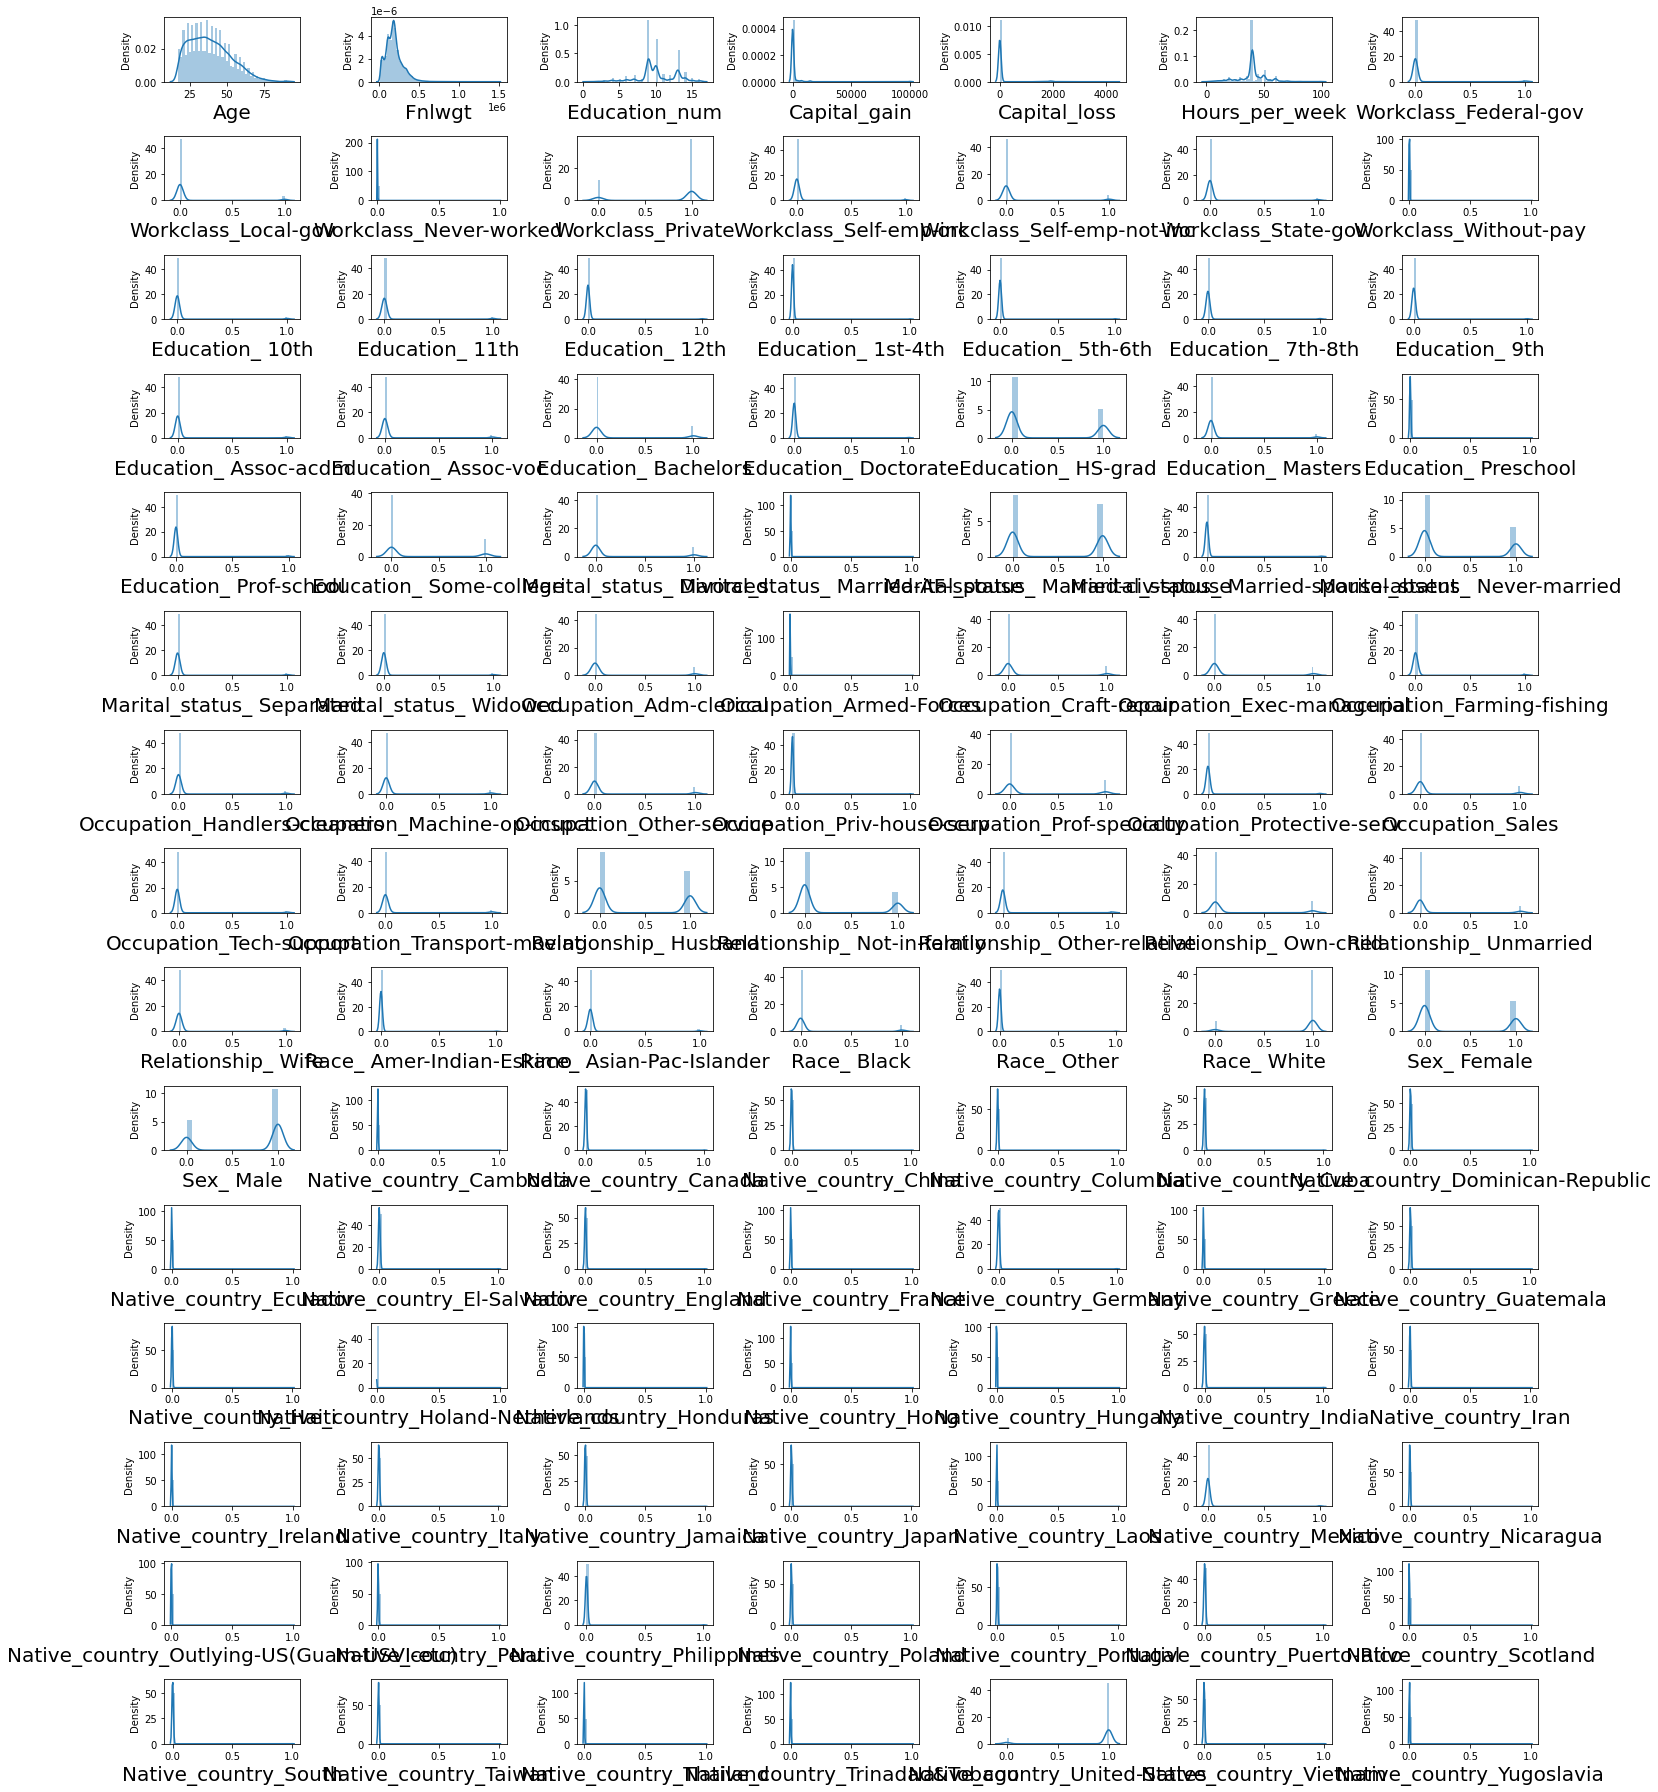

In [85]:
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')
      
plt.figure(figsize = (20,25))
plotnumber = 1

for column in x:
    if plotnumber <=105:
        ax = plt.subplot(15,7, plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

#### Some outliers present in columns

### Power Transformer to remove outliers and skewness

In [119]:
scaler = PowerTransformer(method = 'yeo-johnson')
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.89194656, -1.08988899,  1.16479277, ...,  0.30721362,
        -0.04540906, -0.022173  ],
       [ 0.10271741,  0.39874263, -0.4643296 , ...,  0.30721362,
        -0.04540906, -0.022173  ],
       [ 1.06438077,  0.56254016, -1.20027437, ...,  0.30721362,
        -0.04540906, -0.022173  ],
       ...,
       [ 1.33455599, -0.2197547 , -0.4643296 , ...,  0.30721362,
        -0.04540906, -0.022173  ],
       [-1.35834147,  0.27166793, -0.4643296 , ...,  0.30721362,
        -0.04540906, -0.022173  ],
       [ 1.00782289,  0.98216482, -0.4643296 , ...,  0.30721362,
        -0.04540906, -0.022173  ]])

### Checking Outlier remove or not

---------------------
Distribution Plot :- 
---------------------


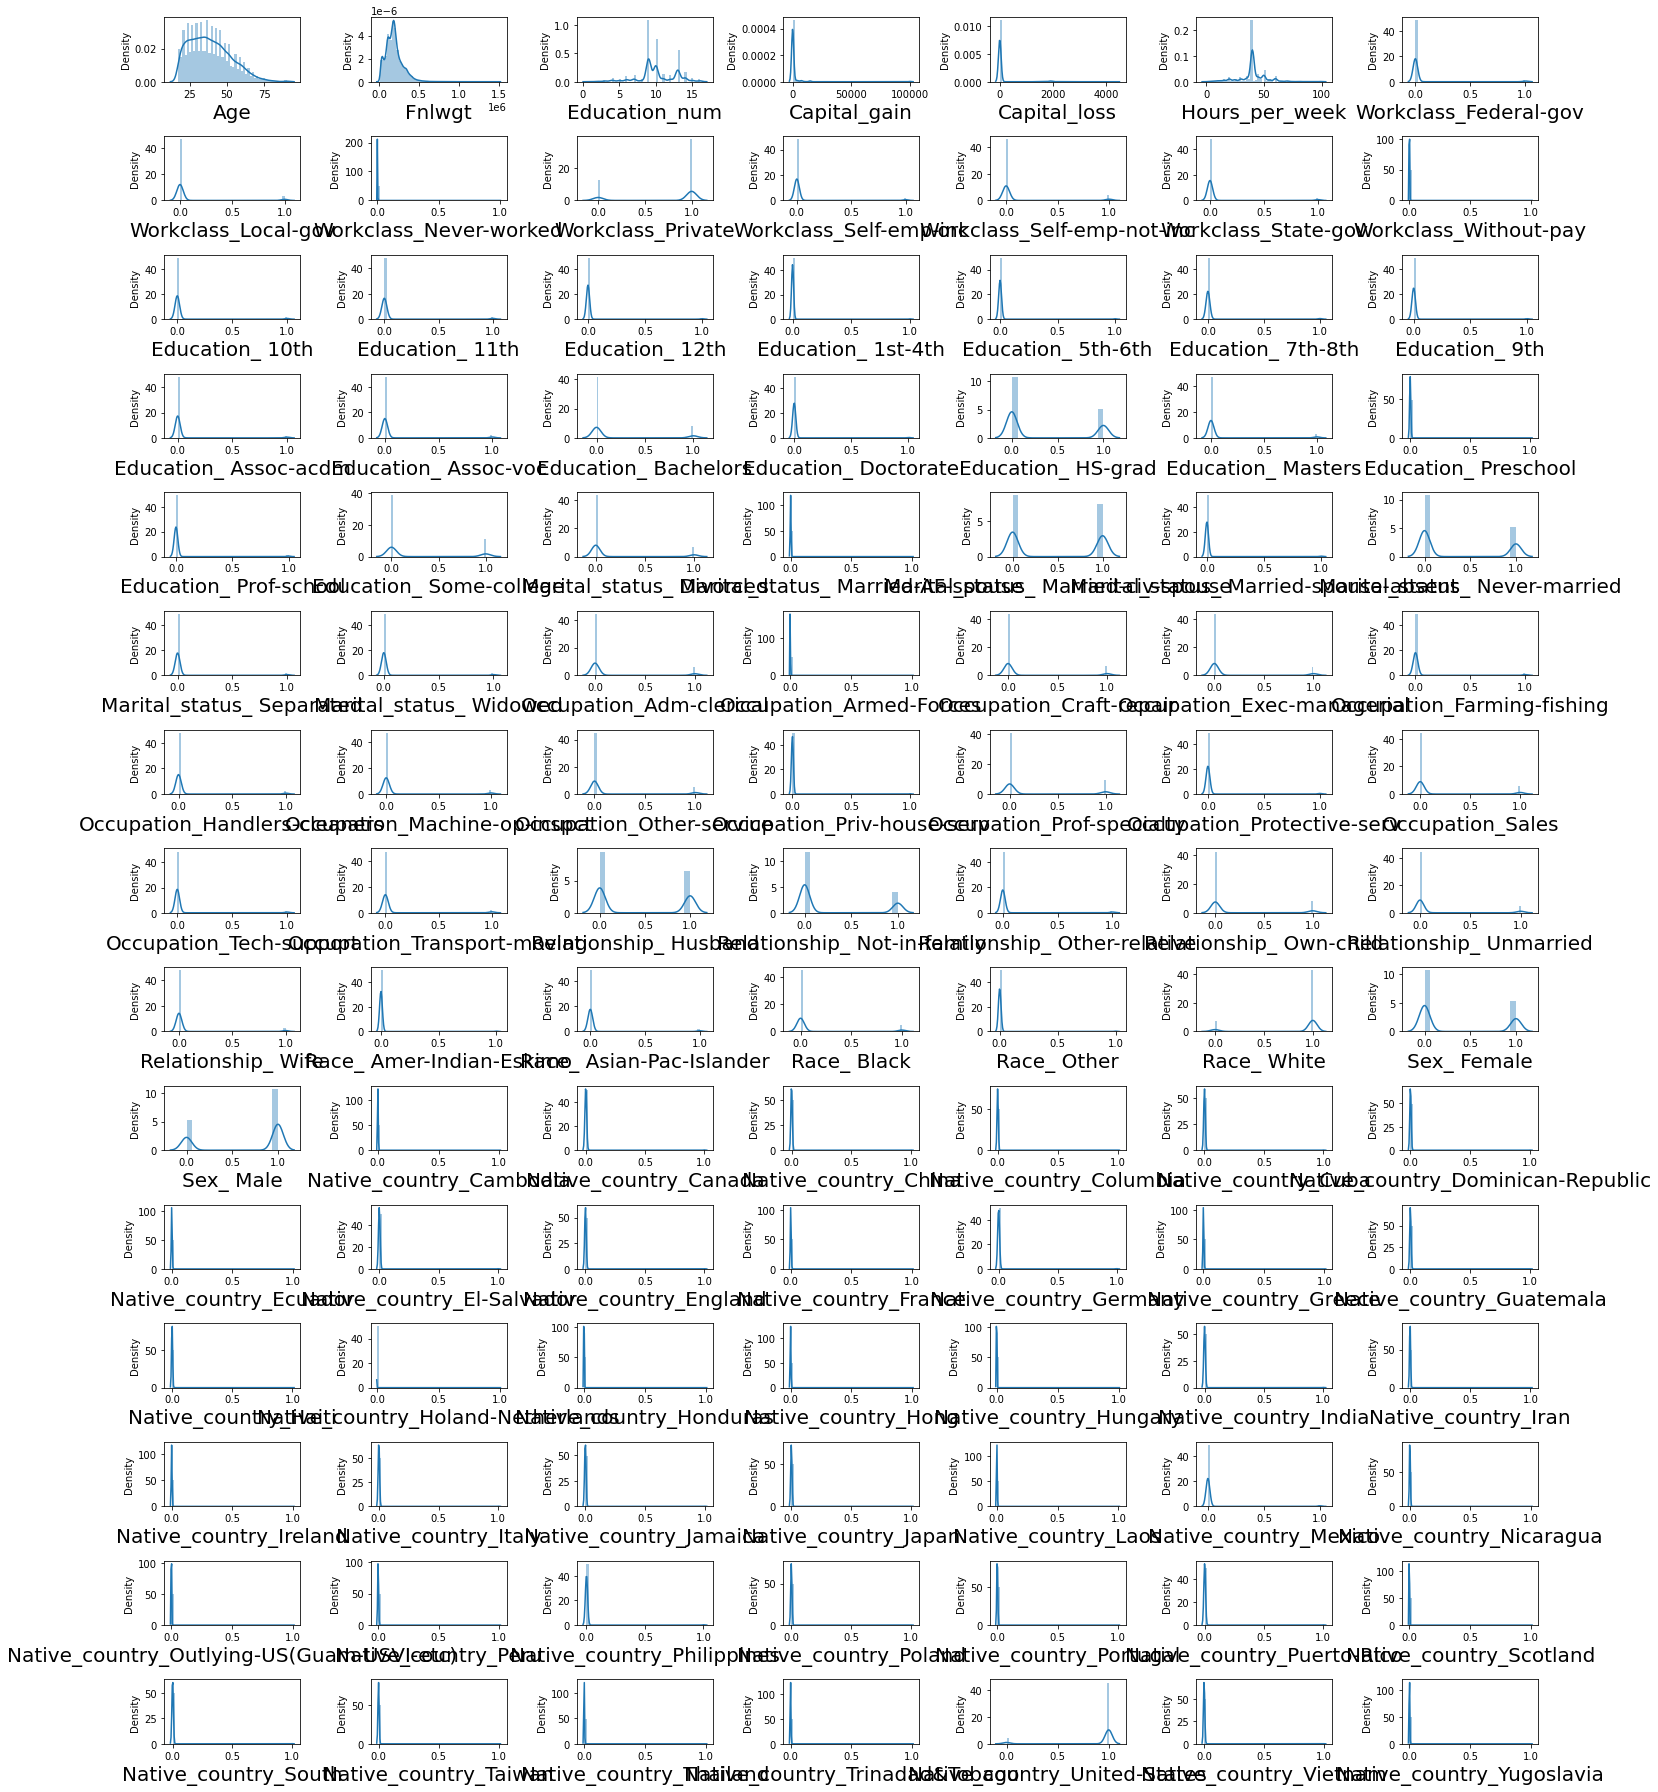

In [89]:
# Let' see outliers are removed in columns or not.
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')
      
plt.figure(figsize = (20,25))
plotnumber = 1

for column in x:
    if plotnumber <=105:
        ax = plt.subplot(15,7, plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

#### Outliers are removed

### Handling Class Imbalance

In [120]:
sm = SMOTE()
x_over, y_over = sm.fit_resample(x,y)

In [121]:
print('---------------------')
print('Class are balanced :-')
print('---------------------')
print(y_over.value_counts())
print('---------------------')

---------------------
Class are balanced :-
---------------------
0    24719
1    24719
Name: Income, dtype: int64
---------------------


### Data Scaling

In [125]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.83709708, -1.0087417 ,  1.13477863, ...,  0.30721362,
        -0.04540906, -0.022173  ],
       [-0.04264043,  0.24504633, -0.42002663, ...,  0.30721362,
        -0.04540906, -0.022173  ],
       [ 1.05703146,  0.42576955, -1.19742926, ...,  0.30721362,
        -0.04540906, -0.022173  ],
       ...,
       [ 1.42358875, -0.3588108 , -0.42002663, ...,  0.30721362,
        -0.04540906, -0.022173  ],
       [-1.21562378,  0.11092744, -0.42002663, ...,  0.30721362,
        -0.04540906, -0.022173  ],
       [ 0.98372   ,  0.92986178, -0.42002663, ...,  0.30721362,
        -0.04540906, -0.022173  ]])

#### Data has been scaled

### Split data into train and test. Model will be bulit on training data and tested on test data

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


## Model Bulding

### Decision Tree model instantiaing, training and evaluating

In [129]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)

In [130]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      6115
           1       0.87      0.87      0.87      6245

    accuracy                           0.87     12360
   macro avg       0.87      0.87      0.87     12360
weighted avg       0.87      0.87      0.87     12360

------------------------------------------------------------



#### Conclusion : Decision Tree model has 87% score

### Cross Validation score to check if the model is overfitting

In [131]:
cv = cross_val_score(DT, x, y, cv = 5)
print('Cross Validation score of Decision Tree model --->', cv.mean())

Cross Validation score of Decision Tree model ---> 0.8141584766584767


#### Conclusion : Decision Tree model has 81% Cross Validation score

### ROC, AUC Curve

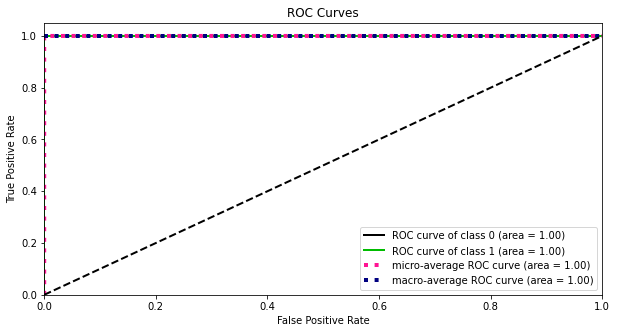

In [132]:
prob = DT.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### XGBoost model instantiaing, training and evaluating

In [133]:
xgb = xgb.XGBClassifier(eval_metric = 'mlogloss')
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [134]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      6115
           1       0.92      0.90      0.91      6245

    accuracy                           0.91     12360
   macro avg       0.91      0.91      0.91     12360
weighted avg       0.91      0.91      0.91     12360

------------------------------------------------------------



#### Conclusion : XGBoost model has 91% score

### Cross Validation score to check if the model is overfitting

In [135]:
cv = cross_val_score(xgb, x, y, cv = 5)
print('Cross Validation score of XGBoost model --->', cv.mean())

Cross Validation score of XGBoost model ---> 0.8708230958230958


#### Conclusion : XGBoost model has 87% Cross Validation score

### ROC, AUC Curve

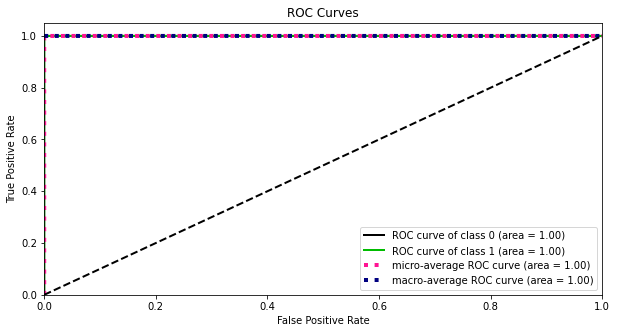

In [136]:
prob = xgb.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Knn model instantiaing, training and evaluating

In [137]:
Knn = KNeighborsClassifier()
Knn.fit(x_train, y_train)
y_pred = Knn.predict(x_test)

In [138]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      6115
           1       0.70      0.77      0.73      6245

    accuracy                           0.72     12360
   macro avg       0.72      0.72      0.72     12360
weighted avg       0.72      0.72      0.72     12360

------------------------------------------------------------



#### Conclusion : KNN model has 72% score

### Cross Validation score to check if the model is overfitting

In [139]:
cv = cross_val_score(Knn, x, y, cv = 5)
print('Cross Validation score of Knn model --->', cv.mean())

Cross Validation score of Knn model ---> 0.7766891891891892


#### Conclusion : Knn model has 77% Cross Validation score

### ROC, AUC Curve

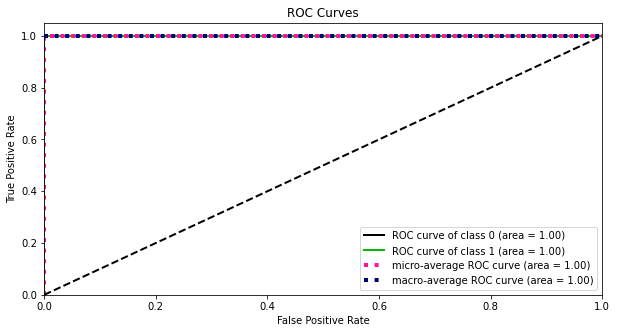

In [140]:
prob = Knn.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Random Forest model instantiaing, training and evaluating

In [141]:
Rn = RandomForestClassifier()
Rn.fit(x_train, y_train)
y_pred = Rn.predict(x_test)

In [142]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6115
           1       0.92      0.89      0.90      6245

    accuracy                           0.90     12360
   macro avg       0.90      0.90      0.90     12360
weighted avg       0.90      0.90      0.90     12360

------------------------------------------------------------



#### Conclusion : Random Forest model has 90% score

### Cross Validation score to check if the model is overfitting

In [143]:
cv = cross_val_score(Rn, x, y, cv = 5)
print('Cross Validation score of Random Forest model --->', cv.mean())

Cross Validation score of Random Forest model ---> 0.8527334152334152


#### Conclusion : Random Forest model has 85% Cross Validation score

### ROC, AUC Curve

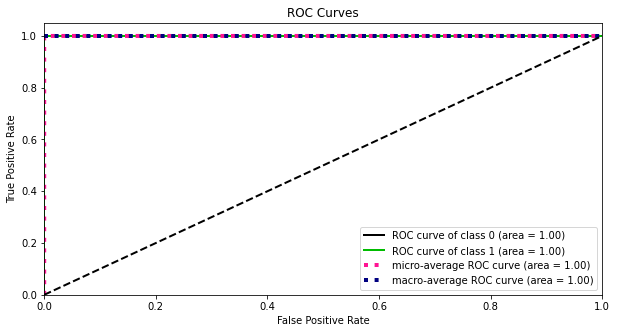

In [144]:
prob = Rn.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Logistic Regression model instantiaing, training and evaluating

In [146]:
Lr = LogisticRegression()
Lr.fit(x_train, y_train)
y_pred = Lr.predict(x_test)

In [147]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.70      0.64      6115
           1       0.64      0.53      0.58      6245

    accuracy                           0.61     12360
   macro avg       0.62      0.61      0.61     12360
weighted avg       0.62      0.61      0.61     12360

------------------------------------------------------------



#### Conclusion : Logistic Regression model has 61% score

### Cross Validation score to check if the model is overfitting

In [148]:
cv = cross_val_score(Lr, x, y, cv = 5)
print('Cross Validation score of Logistic regression model --->', cv.mean())

Cross Validation score of Logistic regression model ---> 0.7976351351351351


#### Conclusion : Logistic Regression model has 79% Cross Validation score

### ROC, AUC Curve

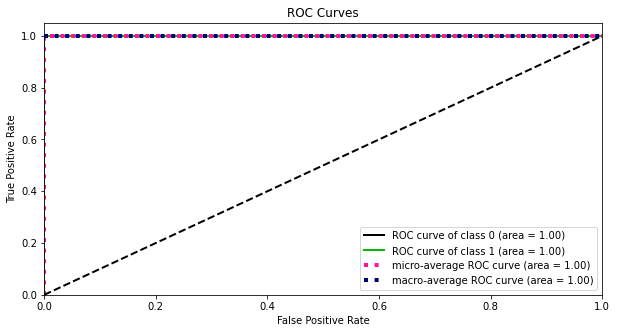

In [149]:
prob = Lr.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Looking CV score we found KNN has best model so we do Hyperparameter Tuning on it


In [150]:
param_grid = {'leaf_size': [1, 3, 5], 'n_neighbors': [5], 'p': [1,2]}

In [151]:
grid_search = GridSearchCV(estimator = Knn, param_grid = param_grid, cv = 5,n_jobs = -1 )

In [152]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 3, 5], 'n_neighbors': [5],
                         'p': [1, 2]})

In [153]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'leaf_size': 1, 'n_neighbors': 5, 'p': 1}


In [156]:
hKnn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 5, p = 1)
hKnn.fit(x_train, y_train)
hKnn.score(x_test, y_test)

0.7362459546925566

In [157]:
y_pred = hKnn.predict(x_test)

In [158]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.66      0.71      6115
           1       0.71      0.81      0.76      6245

    accuracy                           0.74     12360
   macro avg       0.74      0.74      0.73     12360
weighted avg       0.74      0.74      0.73     12360

------------------------------------------------------------



#### After Hyperparameter Tuning model accuracy score 74%.

### Saving The Model

In [166]:
# saving the model to the Local file system
filename = 'Census Income Project.pickle'
pickle.dump(hKnn, open(filename, 'wb'))

## Final Conclusion : KNN is our best model.